In [1]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
from matplotlib import pyplot as plt
from glob import glob
from os import path
from PIL import Image
import pickle

In [ ]:
def process_amd(file_name):
    mat = loadmat(file_name)
    images = mat['images']
    layerMaps = mat['layerMaps']
    width = 512
    height = 1000
    number_of_images = 100
    segmentation_classes = 4
    dict ={}
    dict['image_info'] = {'number_of_images': number_of_images, 'width': width, 'height': height, 'file_name': file_name}
    dict['images'] = []
    for image_number in range(number_of_images):
        segmentation = []
        input_boxes = []
        for i in range(segmentation_classes):
            segmentation.append(np.zeros([width, height]))
            input_boxes.append(np.zeros([segmentation_classes]))
        for i in range(segmentation_classes):
            first_non_nan_value = True
            for j in range(height):
                previous_layerMap = 0
                if i == segmentation_classes-1:
                    layerMap = height-1
                    previous_layerMap = layerMaps[image_number,j,i-1]
                    if np.isnan(previous_layerMap):
                        continue
                else:
                    layerMap = layerMaps[image_number,j,i]
                    if np.isnan(layerMap):
                        continue
                    if i > 0:
                        previous_layerMap = layerMaps[image_number,j,i-1]
                if first_non_nan_value:
                    first_non_nan_value = False
                    input_boxes[i][0] = previous_layerMap
                    input_boxes[i][1] = j
                    input_boxes[i][2] = layerMap
                    input_boxes[i][3] = j
                input_boxes[i][0] = min(input_boxes[i][0], previous_layerMap)
                input_boxes[i][1] = min(input_boxes[i][1], j)
                input_boxes[i][2] = max(input_boxes[i][2], layerMap)
                input_boxes[i][3] = max(input_boxes[i][3], j)
                segmentation[i][int(previous_layerMap):int(layerMap),j] = 1

        dict['images'].append({'image':images[:,:,image_number], 'segmentations': segmentation, 'bbox': input_boxes})

    return dict

In [2]:
mat_amd, mat_dme, mat_control = [],[],[]

In [3]:
for i in range(10):
    number = str(i+1).zfill(2)
    mat_dme.append("..\data\Kaggle\Subject_"+number+".mat")

In [ ]:
"""
dict = mat_dme(mat_dme[0])
test_number = 50
segmentations = dict['images'][test_number]['segmentations']
image = dict['images'][test_number]['image']
plt.imshow(image, cmap='gray')
plt.imshow(segmentations[0], cmap='jet', alpha=0.3)
"""

In [45]:
mat = loadmat(mat_dme[0])
image = mat['images']
manualFluid1 = mat['manualFluid1']
manualFluid2 = mat['manualFluid2']

In [41]:
np.unique(mat['manualFluid2'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 24., nan])

In [50]:
binarized1 = np.where(manualFluid1 ==0, 1,0)
binarized2 = np.where(manualFluid2 ==1, 1,0)

In [51]:
from matplotlib import colors
cmap = colors.ListedColormap(['red', 'white'])

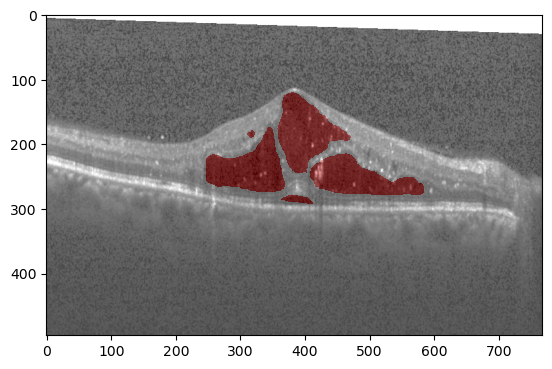

In [52]:
image_number = 30
plt.imshow(image[:,:,image_number], cmap='gray')
plt.imshow(binarized1[:,:,image_number], cmap=cmap, alpha=0.3)

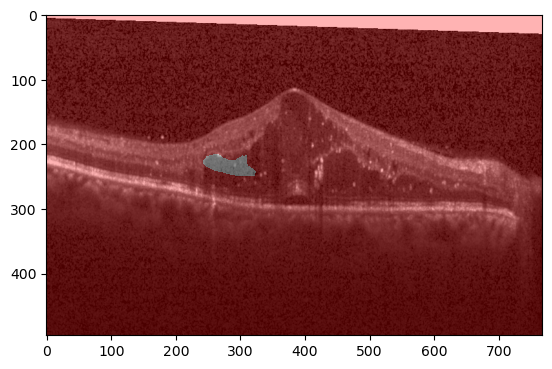

In [53]:
image_number = 30
plt.imshow(image[:,:,image_number], cmap='gray')
plt.imshow(binarized2[:,:,image_number], cmap=cmap, alpha=0.3)

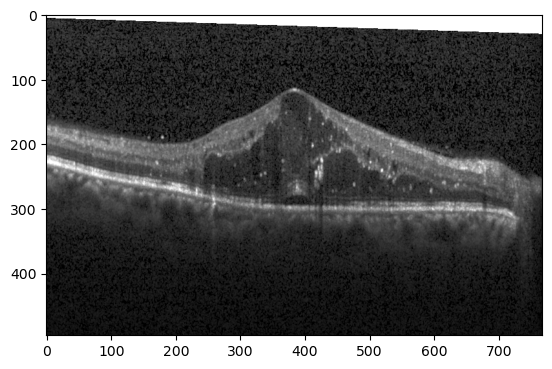

In [25]:
plt.imshow(image[:,:,image_number], cmap='gray')

In [55]:
binarized2

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 